In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')

def create_tunability_plots(model: str):
    df = pd.DataFrame(columns=['value', 'param', 'method'])

    path = f'../Wyniki/tunability/{model}'

    for folder in os.listdir(path):
        new_path = os.path.join(path, folder)
        for file in os.listdir(new_path):
            param = list(filter(lambda x: x not in [model, 'tunability.pickle'], file.split('_')))

            with open(os.path.join(new_path, file), 'rb') as f:
                tunability = pickle.load(f)
                df = pd.concat([df, pd.DataFrame({'value': tunability, 'param': '_'.join(param), 'method': folder})])
    if model == 'XGB':
        df = df[~df['param'].isin(['booster', 'subsumple'])]
    elif model == 'RFC':
        df = df[~df['param'].isin(['bootstrap'])]

    fig_path = f'../Wyniki/plots/tunability/{model}'

    if not os.path.exists(fig_path):
        os.makedirs(fig_path)

    fig, ax = plt.subplots(1, 2, figsize=(20, 12))
    for i, method in enumerate(['random_search', 'bayes_search']):
        method_data = df[df['method'] == method]
        current_ax = ax[i]

        sns.boxplot(x='param', y='value', data=method_data, ax=current_ax, color='#235cc4')

        current_ax.set_title(f'{method.replace("_", " ").title()}', fontsize=20)
        current_ax.set_ylabel('Tunability (AUC)')
        current_ax.set_xlabel('')

        current_ax.tick_params(axis='both', which='major', labelsize=14)
        current_ax.tick_params(axis='both', which='minor', labelsize=14)
        current_ax.xaxis.label.set_size(18)
        current_ax.yaxis.label.set_size(18)
        current_ax.title.set_size(20)

        for tick in current_ax.get_xticklabels():
            tick.set_rotation(45)

        if i == 1:
            current_ax.set_ylim(ax[0].get_ylim())
    plt.savefig(os.path.join(fig_path, f'{model}_tunability.png'), dpi=300, bbox_inches='tight')

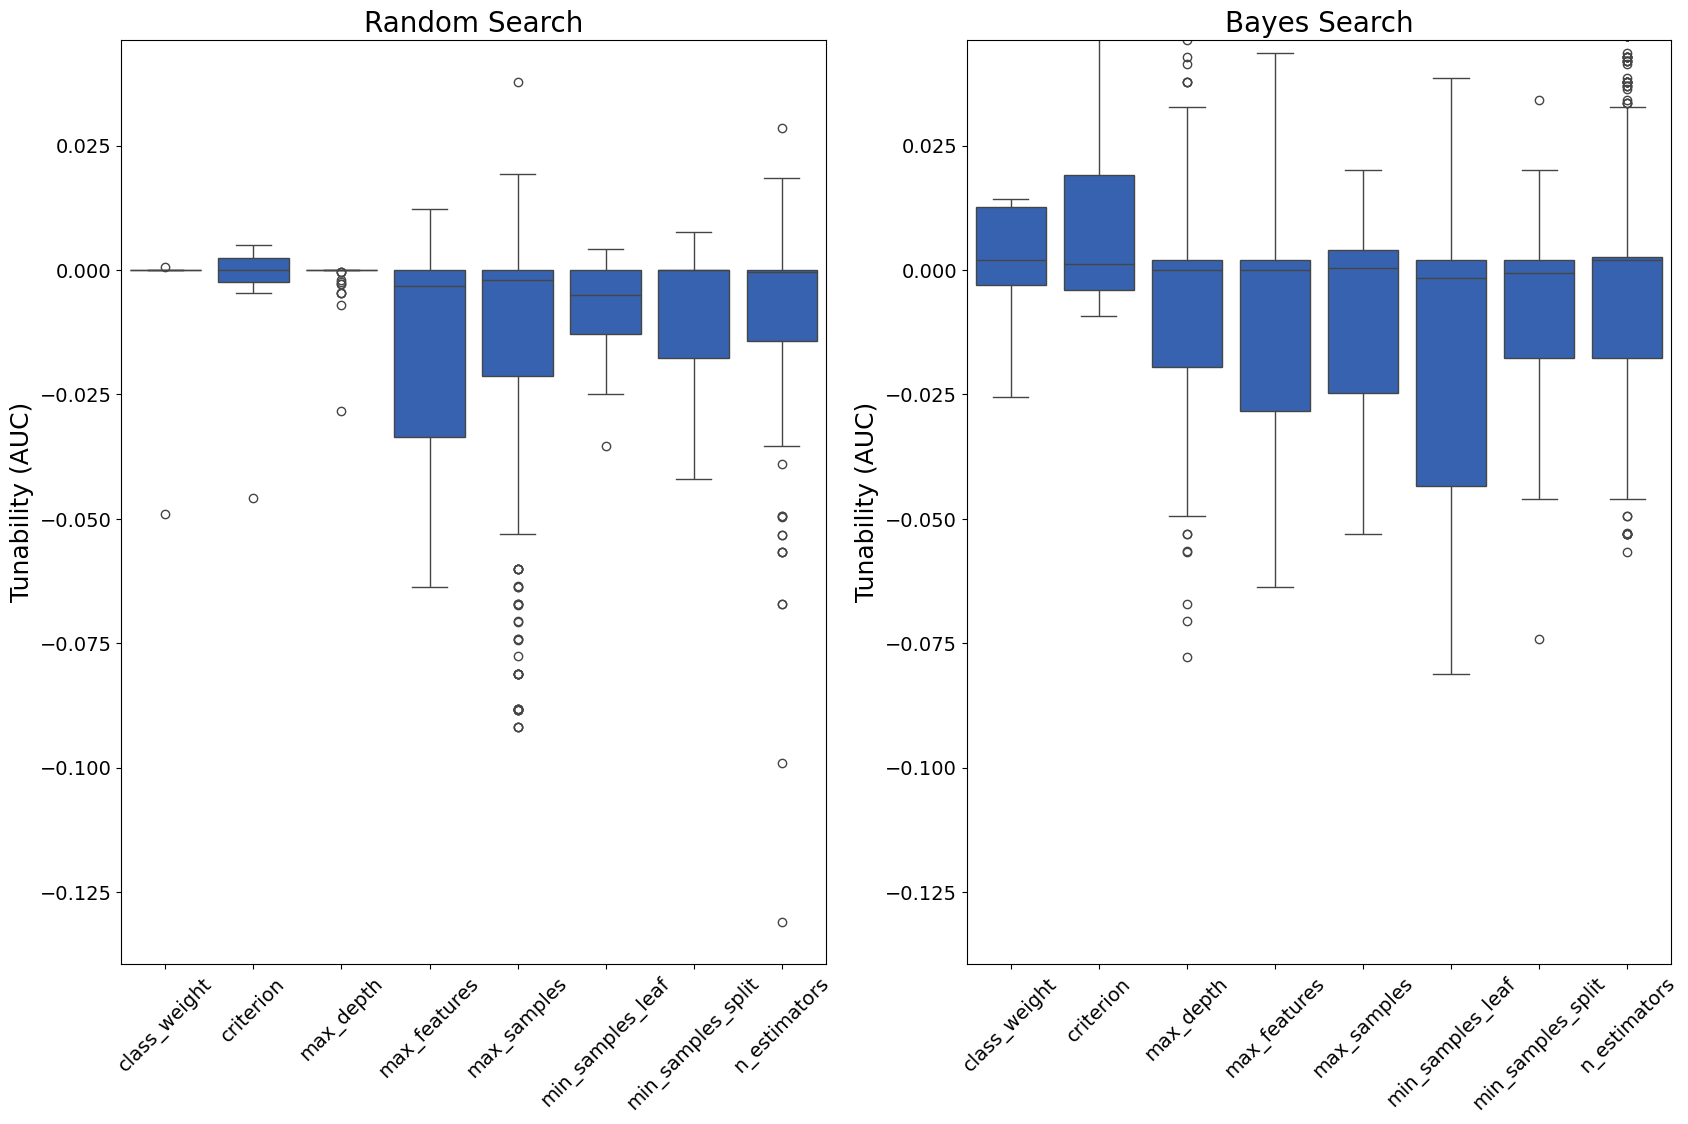

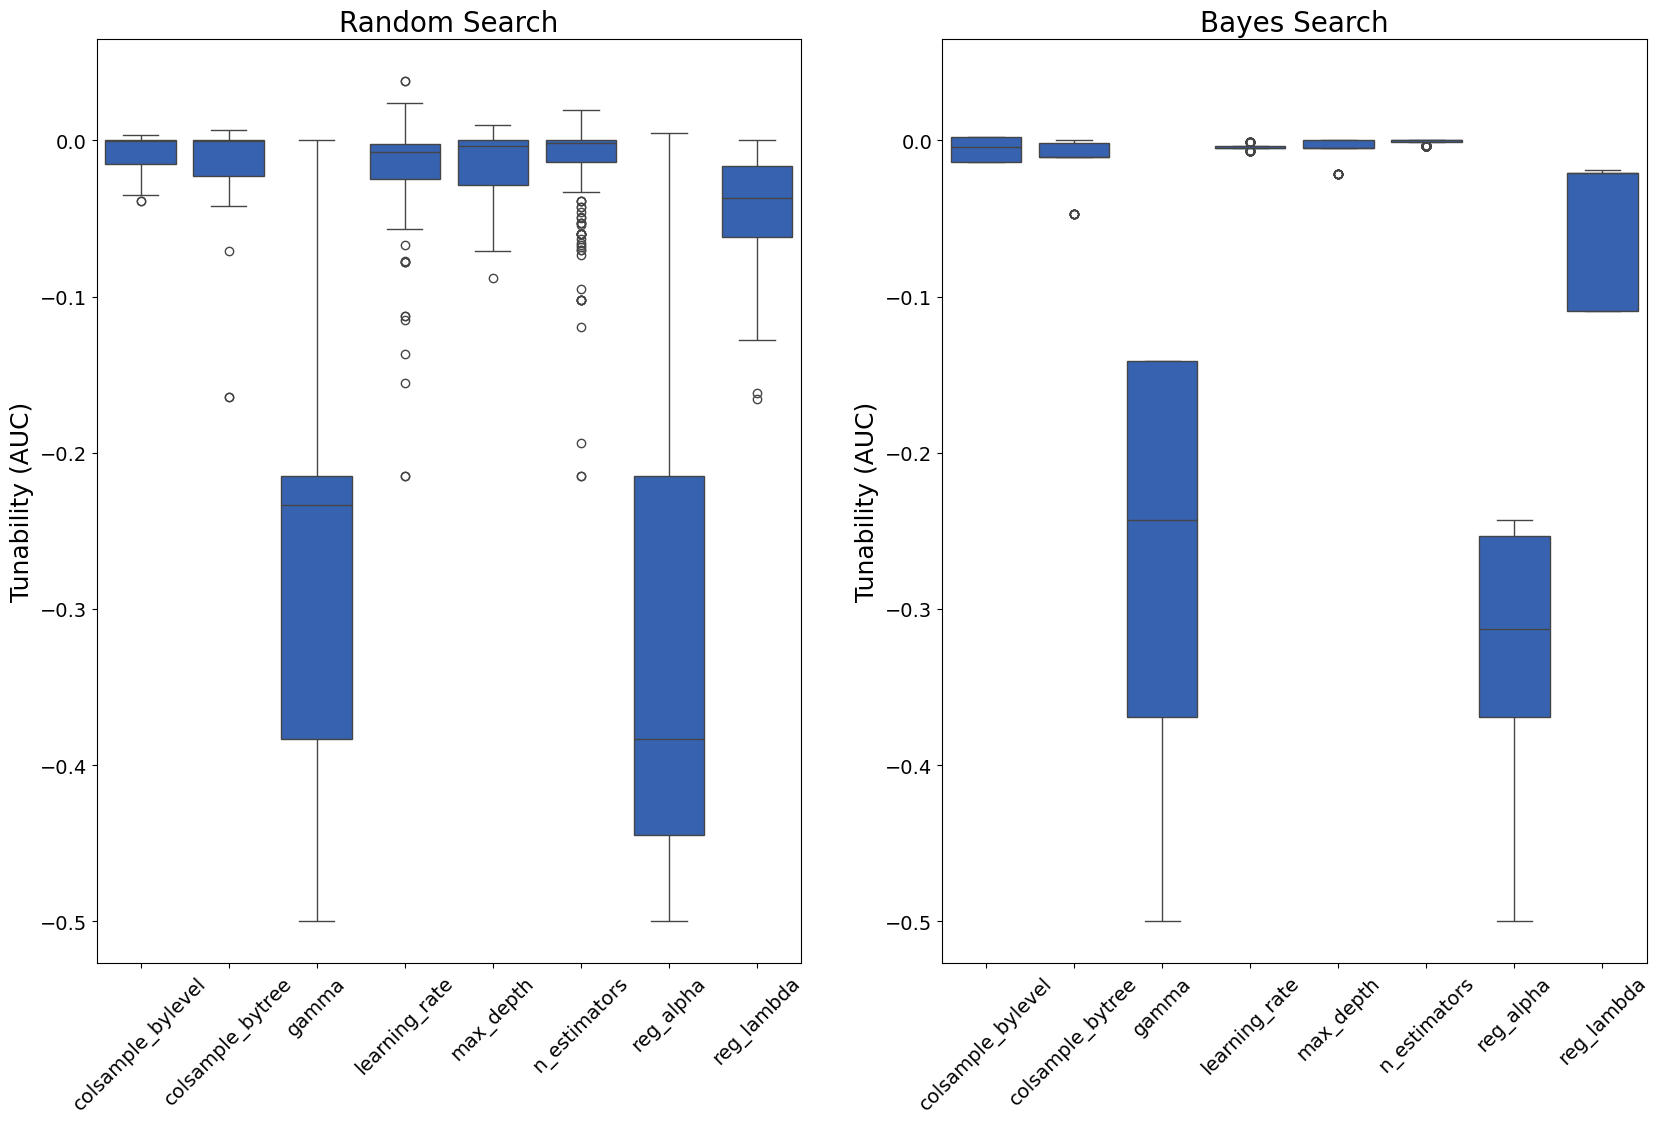

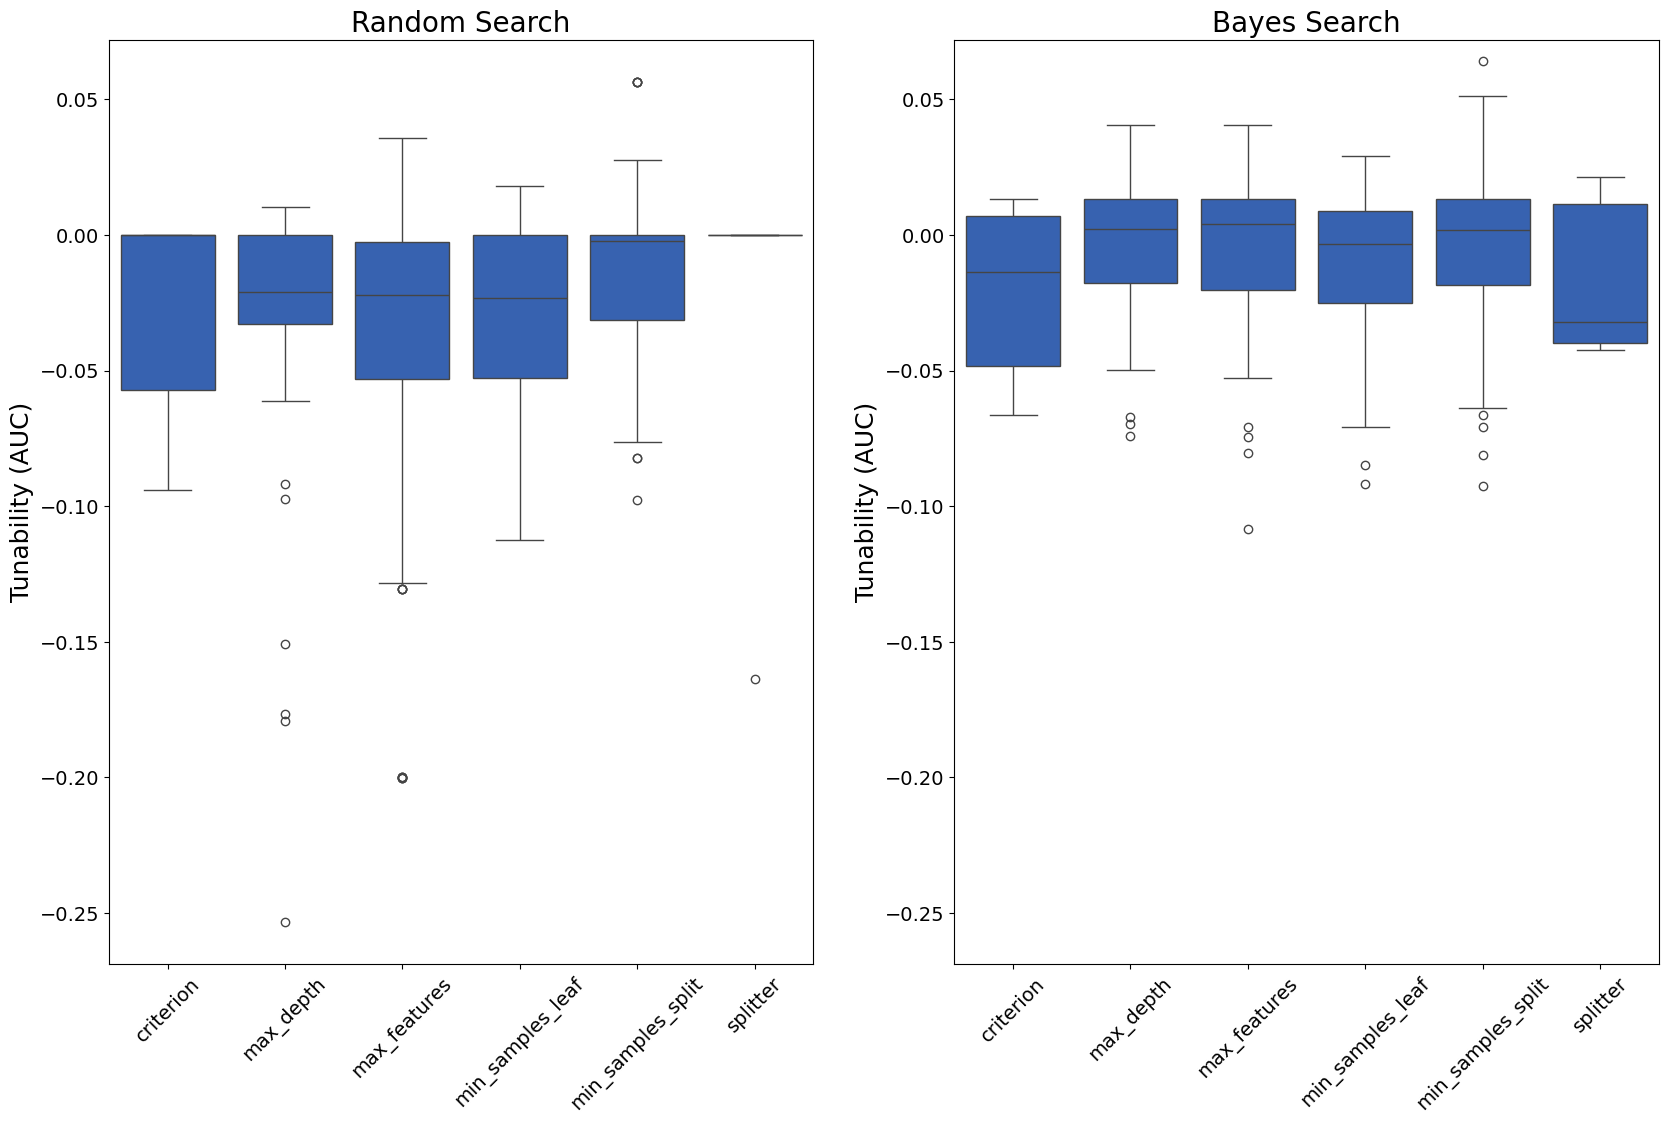

In [2]:
models = ['RFC', 'XGB', 'TREE']

for model in models:
    create_tunability_plots(model)